<a href="https://colab.research.google.com/github/erick-rios/COVID19-erick-rios/blob/main/tarea_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      1     2     3     4
0  0.09  0.15  0.10  0.10
1  0.10  0.12  0.13  0.07
2  0.08  0.17  0.08  0.05
3  0.08  0.18  0.08  0.08
4  0.11  0.14  0.09  0.09
Media por Laboratorio
: 1    0.092
2    0.152
3    0.096
4    0.078
dtype: float64
Desviación estandar por laboratorio 1    0.013038
2    0.023875
3    0.020736
4    0.019235
dtype: float64
1.959963984540054
Laboratorio 1: Intervalo de Confianza del 95% = (0.0806, 0.1034)
Laboratorio 2: Intervalo de Confianza del 95% = (0.1311, 0.1729)
Laboratorio 3: Intervalo de Confianza del 95% = (0.0778, 0.1142)
Laboratorio 4: Intervalo de Confianza del 95% = (0.0611, 0.0949)
Desviación estándar de la columna 1: 0.0130
Desviación estándar de la columna 2: 0.0239
Desviación estándar de la columna 3: 0.0207
Desviación estándar de la columna 4: 0.0192


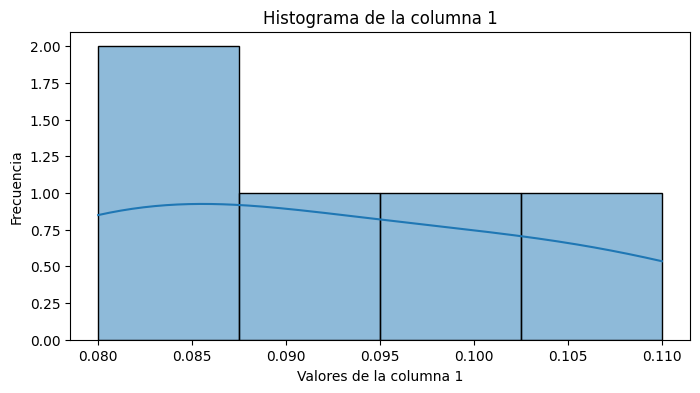

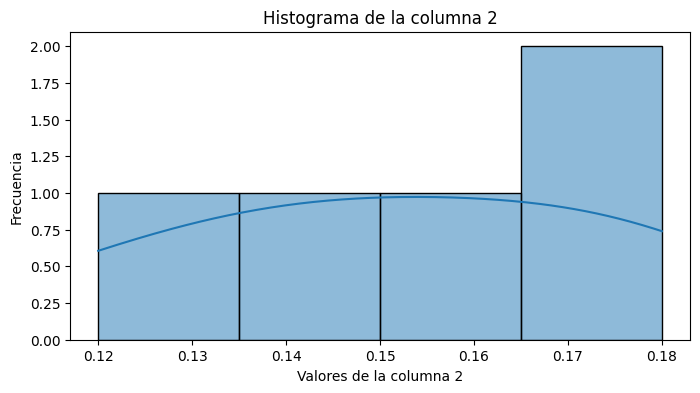

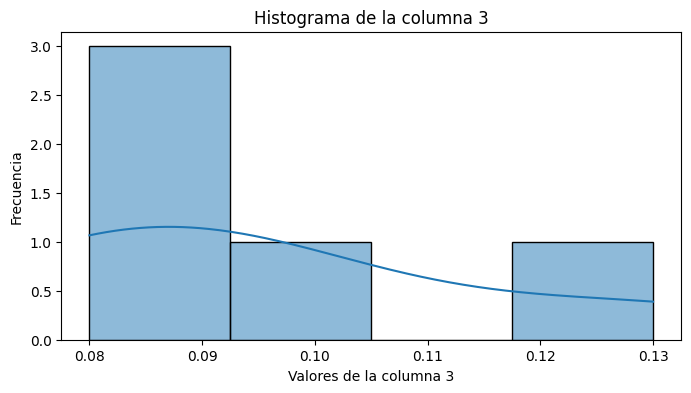

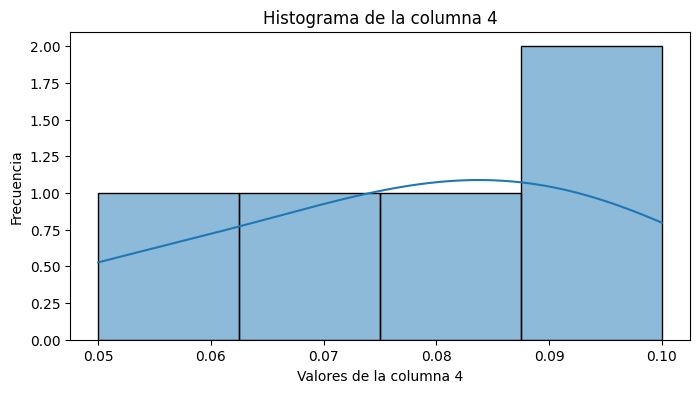

In [96]:
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
from scipy.stats import probplot
import matplotlib.pyplot as plt
from scipy.stats import t

# Datos de ozono en partes por millón
data = pd.read_csv("/content/tarea_1.csv")
print(data)

print("Media por Laboratorio\n:",np.mean(data, axis = 0))
media_por_columna = np.mean(data, axis=0)
# Calcula la desviación estándar por columna utilizando el método muestral
desviacion_estandar_por_columna = data.std(ddof=1)
print("Desviación estandar por laboratorio", desviacion_estandar_por_columna)

# Tamaño de la muestra
tamano_muestra = data.shape[0]

# Grados de libertad para la distribución t
grados_libertad = tamano_muestra-1

# Valor crítico de la distribución normal estándar para un intervalo de confianza del 95%
valor_critico = norm.ppf(0.975)
print(valor_critico)

# Calcula el error estándar
error_estandar = desviacion_estandar_por_columna / np.sqrt(tamano_muestra)

# Calcula los intervalos de confianza del 95%
intervalos_confianza = [
    (media - valor_critico * error, media + valor_critico * error)
    for media, error in zip(media_por_columna, error_estandar)
]

# Imprime los intervalos de confianza para cada laboratorio
for col, intervalo in zip(data.columns, intervalos_confianza):
    print(f'Laboratorio {col}: Intervalo de Confianza del 95% = ({intervalo[0]:.4f}, {intervalo[1]:.4f})')


# Imprime las desviaciones estándar de cada columna
for col, std_dev in zip(desviacion_estandar_por_columna.index, desviacion_estandar_por_columna):
    print(f'Desviación estándar de la columna {col}: {std_dev:.4f}')
# Crea histogramas individuales para cada columna
for col in data.columns:
    plt.figure(figsize=(8, 4))

    # Histograma
    sns.histplot(data[col], kde=True)
    plt.title(f'Histograma de la columna {col}')
    plt.xlabel(f'Valores de la columna {col}')
    plt.ylabel('Frecuencia')
    plt.show()



In [97]:
import numpy as np
from itertools import combinations
from scipy.stats import t

# Datos de ozono en partes por millón
data = pd.read_csv("/content/tarea_1.csv")

# Niveles de confianza
nivel_confianza = 0.95

# Obtener todas las combinaciones de dos localidades
combinaciones = list(combinations(data.columns, 2))

# Calcular los intervalos de confianza para la diferencia de medias
for loc1, loc2 in combinaciones:
    # Datos de las dos localidades
    muestra1 = data[loc1]
    muestra2 = data[loc2]

    # Tamaño de las muestras
    n1 = len(muestra1)
    n2 = len(muestra2)

    # Medias y desviaciones estándar de las muestras
    media1 = np.mean(muestra1)
    media2 = np.mean(muestra2)
    desviacion1 = np.std(muestra1, ddof=1)
    desviacion2 = np.std(muestra2, ddof=1)

    # Valor crítico de la distribución t
    grados_libertad = n1 + n2 - 2
    valor_critico = t.ppf((1 + nivel_confianza) / 2, df=grados_libertad)

    # Error estándar de la diferencia de medias
    error_estandar = np.sqrt((desviacion1**2 / n1) + (desviacion2**2 / n2))

    # Intervalo de confianza para la diferencia de medias
    intervalo_confianza = (media1 - media2 - valor_critico * error_estandar,
                           media1 - media2 + valor_critico * error_estandar)

    # Imprimir resultados
    print(f'Intervalo de Confianza para la Diferencia de Medias entre {loc1} y {loc2}: {intervalo_confianza}')

    # Verificar si los intervalos no se cruzan para indicar si las medias son diferentes
    if intervalo_confianza[0] > 0 or intervalo_confianza[1] < 0:
        print(f'Las medias de {loc1} y {loc2} son diferentes.')
    else:
        print(f'Las medias de {loc1} y {loc2} no son diferentes.')
    print()


Intervalo de Confianza para la Diferencia de Medias entre 1 y 2: (-0.0880537510945875, -0.03194624890541255)
Las medias de 1 y 2 son diferentes.

Intervalo de Confianza para la Diferencia de Medias entre 1 y 3: (-0.029261009649159325, 0.021261009649159317)
Las medias de 1 y 3 no son diferentes.

Intervalo de Confianza para la Diferencia de Medias entre 1 y 4: (-0.00996469794605032, 0.03796469794605031)
Las medias de 1 y 4 no son diferentes.

Intervalo de Confianza para la Diferencia de Medias entre 2 y 3: (0.02338817677347372, 0.08861182322652633)
Las medias de 2 y 3 son diferentes.

Intervalo de Confianza para la Diferencia de Medias entre 2 y 4: (0.04238166428622931, 0.10561833571377074)
Las medias de 2 y 4 son diferentes.

Intervalo de Confianza para la Diferencia de Medias entre 3 y 4: (-0.011168901441887733, 0.047168901441887734)
Las medias de 3 y 4 no son diferentes.



In [98]:
import numpy as np
from itertools import combinations
from scipy.stats import t

# Datos de ozono en partes por millón
data = pd.read_csv("/content/tarea_1.csv")

# Niveles de confianza
nivel_confianza = 0.95

# Obtener todas las combinaciones de dos localidades
combinaciones = list(combinations(data.columns, 2))

# Crear listas para almacenar resultados
diferencias = []
intervalos_confianza = []
diferencia_significativa = []

# Calcular los intervalos de confianza para la diferencia de medias
for loc1, loc2 in combinaciones:
    # Datos de las dos localidades
    muestra1 = data[loc1]
    muestra2 = data[loc2]

    # Tamaño de las muestras
    n1 = len(muestra1)
    n2 = len(muestra2)

    # Medias y desviaciones estándar de las muestras
    media1 = np.mean(muestra1)
    media2 = np.mean(muestra2)
    desviacion1 = np.std(muestra1, ddof=1)
    desviacion2 = np.std(muestra2, ddof=1)

    # Valor crítico de la distribución t
    grados_libertad = n1 + n2 - 2
    valor_critico = t.ppf((1 + nivel_confianza) / 2, df=grados_libertad)

    # Error estándar de la diferencia de medias
    error_estandar = np.sqrt((desviacion1**2 / n1) + (desviacion2**2 / n2))

    # Intervalo de confianza para la diferencia de medias
    intervalo_confianza = (media1 - media2 - valor_critico * error_estandar,
                           media1 - media2 + valor_critico * error_estandar)

    # Diferencia de medias y determinar si es significativa
    diferencia = media1 - media2
    significativa = 'Sí' if intervalo_confianza[0] > 0 or intervalo_confianza[1] < 0 else 'No'

    # Almacenar resultados
    diferencias.append(diferencia)
    intervalos_confianza.append(intervalo_confianza)
    diferencia_significativa.append(significativa)

# Crear DataFrame con resultados
resultados = pd.DataFrame({
    'Localidad 1': [combinacion[0] for combinacion in combinaciones],
    'Localidad 2': [combinacion[1] for combinacion in combinaciones],
    'Diferencia de Medias': diferencias,
    'Intervalo de Confianza': intervalos_confianza,
    'Diferencia Significativa': diferencia_significativa
})

# Guardar resultados en un archivo CSV
resultados.to_csv('/content/resultados_diferencias_1.csv', index=False)


In [99]:
from scipy.stats import f_oneway

# Datos de ozono en partes por millón
data = pd.read_csv("/content/tarea_1.csv")

# Renombrar las columnas para evitar problemas con números como etiquetas
data.columns = ['Loc1', 'Loc2', 'Loc3', 'Loc4']

# Realizar la prueba de ANOVA
resultado_anova = f_oneway(data['Loc1'], data['Loc2'], data['Loc3'], data['Loc4'])

# Imprimir resultados
print("Estadística de prueba F:", resultado_anova.statistic)
print("Valor p:", resultado_anova.pvalue)

# Interpretar los resultados
alpha = 0.05
if resultado_anova.pvalue < alpha:
    print("Hay evidencia suficiente para rechazar la hipótesis nula. Hay diferencias significativas en al menos una de las medias.")
else:
    print("No hay evidencia suficiente para rechazar la hipótesis nula. No hay diferencias significativas en las medias.")


Estadística de prueba F: 13.796536796536781
Valor p: 0.00010566485184724188
Hay evidencia suficiente para rechazar la hipótesis nula. Hay diferencias significativas en al menos una de las medias.


In [100]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Datos de ozono en partes por millón
data = pd.read_csv("/content/tarea_1.csv")

# Apilar los datos en un formato adecuado para la prueba de Tukey
stacked_data = data.melt(var_name='Localidad', value_name='Ozono')
print(stacked_data)

# Realizar la prueba de Tukey
tukey_results = pairwise_tukeyhsd(endog=stacked_data['Ozono'], groups=stacked_data['Localidad'], alpha=0.05)

# Imprimir los resultados
print(tukey_results)

# Resumen de los resultados
tukey_results.summary()


   Localidad  Ozono
0          1   0.09
1          1   0.10
2          1   0.08
3          1   0.08
4          1   0.11
5          2   0.15
6          2   0.12
7          2   0.17
8          2   0.18
9          2   0.14
10         3   0.10
11         3   0.13
12         3   0.08
13         3   0.08
14         3   0.09
15         4   0.10
16         4   0.07
17         4   0.05
18         4   0.08
19         4   0.09
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2     0.06 0.0009  0.0245  0.0955   True
     1      3    0.004  0.988 -0.0315  0.0395  False
     1      4   -0.014 0.6781 -0.0495  0.0215  False
     2      3   -0.056 0.0018 -0.0915 -0.0205   True
     2      4   -0.074 0.0001 -0.1095 -0.0385   True
     3      4   -0.018 0.4882 -0.0535  0.0175  False
----------------------------------------------------


group1,group2,meandiff,p-adj,lower,upper,reject
1,2,0.06,0.0009,0.0245,0.0955,True
1,3,0.004,0.988,-0.0315,0.0395,False
1,4,-0.014,0.6781,-0.0495,0.0215,False
2,3,-0.056,0.0018,-0.0915,-0.0205,True
2,4,-0.074,0.0001,-0.1095,-0.0385,True
3,4,-0.018,0.4882,-0.0535,0.0175,False


In [101]:
!pip install scipy pingouin




      A     B     C     D
0  58.7  62.7  55.9  60.7
1  61.4  64.5  56.1  60.3
2  60.9  63.1  57.3  60.9
3  59.1  59.2  55.2  61.4
4  58.2  60.3  58.1  62.3
Media por Laboratorio
: A    59.66
B    61.96
C    56.52
D    61.12
dtype: float64
Desviación estandar por laboratorio A    1.408190
B    2.160555
C    1.162755
D    0.769415
dtype: float64
1.959963984540054
Laboratorio A: Intervalo de Confianza del 95% = (58.4257, 60.8943)
Laboratorio B: Intervalo de Confianza del 95% = (60.0662, 63.8538)
Laboratorio C: Intervalo de Confianza del 95% = (55.5008, 57.5392)
Laboratorio D: Intervalo de Confianza del 95% = (60.4456, 61.7944)
Desviación estándar de la columna A: 1.4082
Desviación estándar de la columna B: 2.1606
Desviación estándar de la columna C: 1.1628
Desviación estándar de la columna D: 0.7694


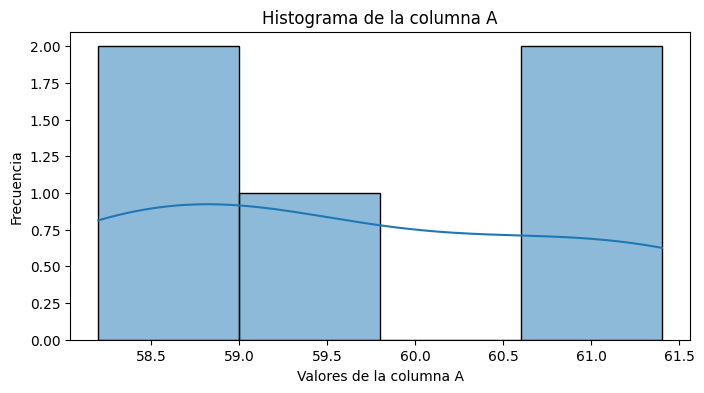

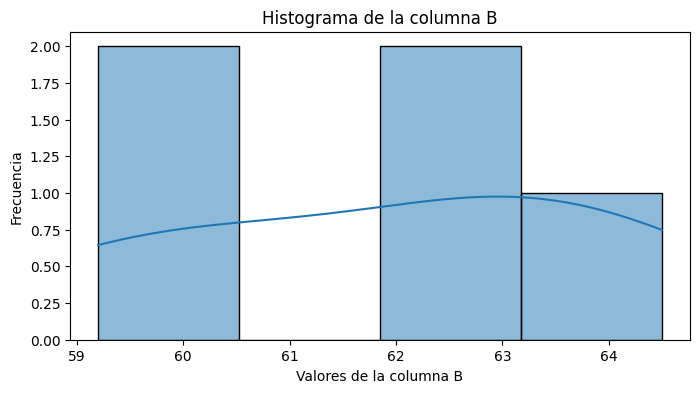

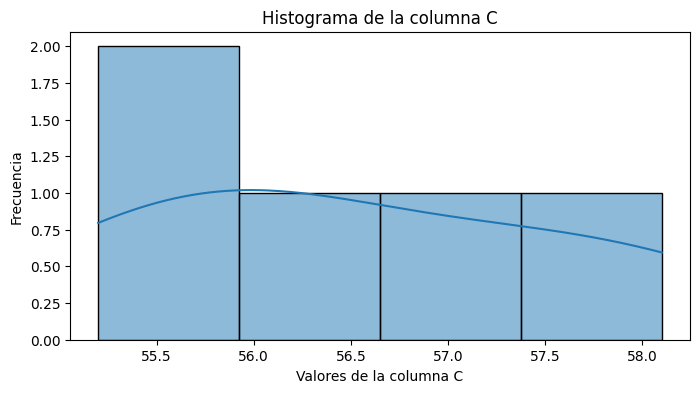

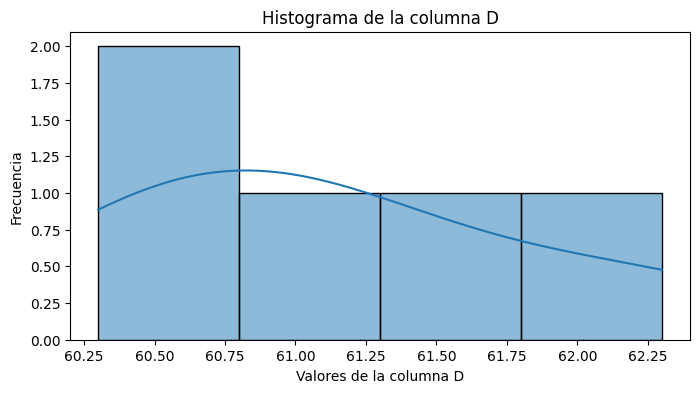

In [102]:
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
from scipy.stats import probplot
import matplotlib.pyplot as plt
from scipy.stats import t

# Datos de ozono en partes por millón
data = pd.read_csv("/content/tarea_2.csv")
print(data)

print("Media por Laboratorio\n:",np.mean(data, axis = 0))
media_por_columna = np.mean(data, axis=0)
# Calcula la desviación estándar por columna utilizando el método muestral
desviacion_estandar_por_columna = data.std(ddof=1)
print("Desviación estandar por laboratorio", desviacion_estandar_por_columna)

# Tamaño de la muestra
tamano_muestra = data.shape[0]

# Grados de libertad para la distribución t
grados_libertad = tamano_muestra-1

# Valor crítico de la distribución normal estándar para un intervalo de confianza del 95%
valor_critico = norm.ppf(0.975)
print(valor_critico)

# Calcula el error estándar
error_estandar = desviacion_estandar_por_columna / np.sqrt(tamano_muestra)

# Calcula los intervalos de confianza del 95%
intervalos_confianza = [
    (media - valor_critico * error, media + valor_critico * error)
    for media, error in zip(media_por_columna, error_estandar)
]

# Imprime los intervalos de confianza para cada laboratorio
for col, intervalo in zip(data.columns, intervalos_confianza):
    print(f'Laboratorio {col}: Intervalo de Confianza del 95% = ({intervalo[0]:.4f}, {intervalo[1]:.4f})')


# Imprime las desviaciones estándar de cada columna
for col, std_dev in zip(desviacion_estandar_por_columna.index, desviacion_estandar_por_columna):
    print(f'Desviación estándar de la columna {col}: {std_dev:.4f}')
# Crea histogramas individuales para cada columna
for col in data.columns:
    plt.figure(figsize=(8, 4))

    # Histograma
    sns.histplot(data[col], kde=True)
    plt.title(f'Histograma de la columna {col}')
    plt.xlabel(f'Valores de la columna {col}')
    plt.ylabel('Frecuencia')
    plt.show()


In [103]:
import numpy as np
from itertools import combinations
from scipy.stats import t

# Datos de ozono en partes por millón
data = pd.read_csv("/content/tarea_2.csv")

# Niveles de confianza
nivel_confianza = 0.95

# Obtener todas las combinaciones de dos localidades
combinaciones = list(combinations(data.columns, 2))

# Calcular los intervalos de confianza para la diferencia de medias
for loc1, loc2 in combinaciones:
    # Datos de las dos localidades
    muestra1 = data[loc1]
    muestra2 = data[loc2]

    # Tamaño de las muestras
    n1 = len(muestra1)
    n2 = len(muestra2)

    # Medias y desviaciones estándar de las muestras
    media1 = np.mean(muestra1)
    media2 = np.mean(muestra2)
    desviacion1 = np.std(muestra1, ddof=1)
    desviacion2 = np.std(muestra2, ddof=1)

    # Valor crítico de la distribución t
    grados_libertad = n1 + n2 - 2
    valor_critico = t.ppf((1 + nivel_confianza) / 2, df=grados_libertad)

    # Error estándar de la diferencia de medias
    error_estandar = np.sqrt((desviacion1**2 / n1) + (desviacion2**2 / n2))

    # Intervalo de confianza para la diferencia de medias
    intervalo_confianza = (media1 - media2 - valor_critico * error_estandar,
                           media1 - media2 + valor_critico * error_estandar)

    # Imprimir resultados
    print(f'Intervalo de Confianza para la Diferencia de Medias entre {loc1} y {loc2}: {intervalo_confianza}')

    # Verificar si los intervalos no se cruzan para indicar si las medias son diferentes
    if intervalo_confianza[0] > 0 or intervalo_confianza[1] < 0:
        print(f'Las medias de {loc1} y {loc2} son diferentes.')
    else:
        print(f'Las medias de {loc1} y {loc2} no son diferentes.')
    print()


Intervalo de Confianza para la Diferencia de Medias entre A y B: (-4.959613651485149, 0.3596136514851551)
Las medias de A y B no son diferentes.

Intervalo de Confianza para la Diferencia de Medias entre A y C: (1.2566848558412778, 5.023315144158723)
Las medias de A y C son diferentes.

Intervalo de Confianza para la Diferencia de Medias entre A y D: (-3.1148692883298557, 0.19486928832985373)
Las medias de A y D no son diferentes.

Intervalo de Confianza para la Diferencia de Medias entre B y C: (2.9096923694474666, 7.970307630552529)
Las medias de B y C son diferentes.

Intervalo de Confianza para la Diferencia de Medias entre B y D: (-1.5252004427684662, 3.205200442768459)
Las medias de B y D no son diferentes.

Intervalo de Confianza para la Diferencia de Medias entre C y D: (-6.03788187676302, -3.1621181232369833)
Las medias de C y D son diferentes.



In [104]:
import numpy as np
from itertools import combinations
from scipy.stats import t

# Datos de ozono en partes por millón
data = pd.read_csv("/content/tarea_2.csv")

# Niveles de confianza
nivel_confianza = 0.95

# Obtener todas las combinaciones de dos localidades
combinaciones = list(combinations(data.columns, 2))

# Crear listas para almacenar resultados
diferencias = []
intervalos_confianza = []
diferencia_significativa = []

# Calcular los intervalos de confianza para la diferencia de medias
for loc1, loc2 in combinaciones:
    # Datos de las dos localidades
    muestra1 = data[loc1]
    muestra2 = data[loc2]

    # Tamaño de las muestras
    n1 = len(muestra1)
    n2 = len(muestra2)

    # Medias y desviaciones estándar de las muestras
    media1 = np.mean(muestra1)
    media2 = np.mean(muestra2)
    desviacion1 = np.std(muestra1, ddof=1)
    desviacion2 = np.std(muestra2, ddof=1)

    # Valor crítico de la distribución t
    grados_libertad = n1 + n2 - 2
    valor_critico = t.ppf((1 + nivel_confianza) / 2, df=grados_libertad)

    # Error estándar de la diferencia de medias
    error_estandar = np.sqrt((desviacion1**2 / n1) + (desviacion2**2 / n2))

    # Intervalo de confianza para la diferencia de medias
    intervalo_confianza = (media1 - media2 - valor_critico * error_estandar,
                           media1 - media2 + valor_critico * error_estandar)

    # Diferencia de medias y determinar si es significativa
    diferencia = media1 - media2
    significativa = 'Sí' if intervalo_confianza[0] > 0 or intervalo_confianza[1] < 0 else 'No'

    # Almacenar resultados
    diferencias.append(diferencia)
    intervalos_confianza.append(intervalo_confianza)
    diferencia_significativa.append(significativa)

# Crear DataFrame con resultados
resultados = pd.DataFrame({
    'Localidad 1': [combinacion[0] for combinacion in combinaciones],
    'Localidad 2': [combinacion[1] for combinacion in combinaciones],
    'Diferencia de Medias': diferencias,
    'Intervalo de Confianza': intervalos_confianza,
    'Diferencia Significativa': diferencia_significativa
})

# Guardar resultados en un archivo CSV
resultados.to_csv('/content/resultados_diferencias_2.csv', index=False)


In [105]:
from scipy.stats import f_oneway

# Datos de ozono en partes por millón
data = pd.read_csv("/content/tarea_2.csv")

# Renombrar las columnas para evitar problemas con números como etiquetas
data.columns = ['Loc1', 'Loc2', 'Loc3', 'Loc4']

# Realizar la prueba de ANOVA
resultado_anova = f_oneway(data['Loc1'], data['Loc2'], data['Loc3'], data['Loc4'])

# Imprimir resultados
print("Estadística de prueba F:", resultado_anova.statistic)
print("Valor p:", resultado_anova.pvalue)

# Interpretar los resultados
alpha = 0.05
if resultado_anova.pvalue < alpha:
    print("Hay evidencia suficiente para rechazar la hipótesis nula. Hay diferencias significativas en al menos una de las medias.")
else:
    print("No hay evidencia suficiente para rechazar la hipótesis nula. No hay diferencias significativas en las medias.")


Estadística de prueba F: 13.329532674035303
Valor p: 0.0001282323270904094
Hay evidencia suficiente para rechazar la hipótesis nula. Hay diferencias significativas en al menos una de las medias.


In [106]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Datos de ozono en partes por millón
data = pd.read_csv("/content/tarea_2.csv")

# Apilar los datos en un formato adecuado para la prueba de Tukey
stacked_data = data.melt(var_name='Localidad', value_name='Ozono')
print(stacked_data)

# Realizar la prueba de Tukey
tukey_results = pairwise_tukeyhsd(endog=stacked_data['Ozono'], groups=stacked_data['Localidad'], alpha=0.05)

# Imprimir los resultados
print(tukey_results)

# Resumen de los resultados
tukey_results.summary()


   Localidad  Ozono
0          A   58.7
1          A   61.4
2          A   60.9
3          A   59.1
4          A   58.2
5          B   62.7
6          B   64.5
7          B   63.1
8          B   59.2
9          B   60.3
10         C   55.9
11         C   56.1
12         C   57.3
13         C   55.2
14         C   58.1
15         D   60.7
16         D   60.3
17         D   60.9
18         D   61.4
19         D   62.3
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B      2.3 0.1015 -0.3524  4.9524  False
     A      C    -3.14 0.0178 -5.7924 -0.4876   True
     A      D     1.46 0.4195 -1.1924  4.1124  False
     B      C    -5.44 0.0001 -8.0924 -2.7876   True
     B      D    -0.84 0.8019 -3.4924  1.8124  False
     C      D      4.6 0.0007  1.9476  7.2524   True
----------------------------------------------------


group1,group2,meandiff,p-adj,lower,upper,reject
A,B,2.3,0.1015,-0.3524,4.9524,False
A,C,-3.14,0.0178,-5.7924,-0.4876,True
A,D,1.46,0.4195,-1.1924,4.1124,False
B,C,-5.44,0.0001,-8.0924,-2.7876,True
B,D,-0.84,0.8019,-3.4924,1.8124,False
C,D,4.6,0.0007,1.9476,7.2524,True
